In [1]:
# import talib
import numpy as np
# import pandas as pd
from backtesting_mom.signals1 import params_short, compute_signals_short
from backtesting.utils_compact import compact_all_medians, compact_best_medians
import warnings
warnings.simplefilter('ignore')

/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


In [2]:
interval = '1h'
direction = 'short'
symbols = [
    "BTCUSDT",
    "ETHUSDT",
    "SOLUSDT",
    "BNBUSDT",
]

In [3]:
params = params_short()
print(params.keys())

Number of permutations params_long: 96
dict_keys(['adx_p', 'adx_low', 'adx_high'])


In [4]:
medians_df, ohlc_dict, count_bars = compact_all_medians(
    symbols,
    interval,
    params,
    compute_signals_short,
)

Available pools -1: 15


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


Start computing signals for SOLUSDT
Start computing signals for BTCUSDT
Start computing signals for ETHUSDT
Start computing signals for BNBUSDT
End computing signals for BTCUSDT
End computing signals for ETHUSDT
End computing signals for SOLUSDT
End computing signals for BNBUSDT


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


Start computing portfolio metrics for SOLUSDT
Start computing portfolio metrics for BTCUSDT
Start computing portfolio metrics for ETHUSDT
Start computing portfolio metrics for BNBUSDT
End computing portfolio metrics for ETHUSDT
End computing portfolio metrics for BNBUSDT
End computing portfolio metrics for SOLUSDT
End computing portfolio metrics for BTCUSDT


In [5]:
print(count_bars)

8784


In [6]:
joined_long_df = medians_df.copy()
joined_long_df = joined_long_df.replace([np.inf, -np.inf], np.nan)
joined_long_df = joined_long_df.dropna()
# remove with negative total return
# joined_long_df = joined_long_df[joined_long_df['total_return'] > 0]
# joined_long_df = joined_long_df[joined_long_df > joined_long_df.quantile(0.45)]
joined_long_df = joined_long_df.dropna()
print(joined_long_df.describe())
# joined_long_df.sort_values(by='win_rate', ascending=False)
# joined_long_df.reset_index().to_csv(f'results_{direction}_{interval}_{count_bars}.csv', index=False)
joined_long_df = joined_long_df.sort_values(by='expectancy', ascending=False).head(55)
joined_long_df.head(10)

       total_return   win_rate      count  profit_factor  max_drawdown  \
count     96.000000  96.000000  96.000000      96.000000     96.000000   
mean      -0.118777   0.663738  59.161458       0.497679     -0.131294   
std        0.042770   0.030935  13.708717       0.071937      0.041864   
min       -0.219607   0.596849  33.500000       0.368299     -0.228336   
25%       -0.147155   0.646707  47.500000       0.458240     -0.156178   
50%       -0.118287   0.658915  59.000000       0.478980     -0.130367   
75%       -0.080270   0.685201  66.500000       0.544298     -0.095316   
max       -0.056143   0.720779  80.000000       0.640754     -0.060863   

       expectancy  
count   96.000000  
mean    -1.930318  
std      0.398486  
min     -2.721582  
25%     -2.139053  
50%     -1.960955  
75%     -1.670745  
max     -1.173067  


total_return  win_rate  count  \
long_adx_p long_adx_low long_adx_high                                  
20         20           28                -0.059180  0.720779   47.5   
                        30                -0.059180  0.720779   47.5   
                        32                -0.059180  0.720779   47.5   
                        34                -0.059180  0.720779   47.5   
14         24           34                -0.077463  0.717337   63.5   
                        32                -0.077463  0.717337   63.5   
                        30                -0.077463  0.717337   63.5   
                        28                -0.077463  0.717337   63.5   
18         20           28                -0.066042  0.715142   52.5   
                        30                -0.066042  0.715142   52.5   

                                       profit_factor  max_drawdown  expectancy  
long_adx_p long_adx_low long_adx_high                                           
20         20           28                  0.640754     -0.079571   -1.173067  
                        30                  0.640754     -0.079571   -1.173067  
                        32                  0.640754     -0.079571   -1.173067  
                        34                  0.640754     -0.079571   -1.173067  
14         24           34                  0.635072     -0.095918   -1.208810  
                        32                  0.635072     -0.095918   -1.208810  
                        30                  0.635072     -0.095918   -1.208810  
                        28                  0.635072     -0.095918   -1.208810  
18         20           28                  0.635085     -0.078124   -1.245924  
                        30                  0.635085     -0.078124   -1.245924

In [7]:
dfc = joined_long_df.copy()
joined_best_orig_df, pf_dict = compact_best_medians(
    dfc,
    symbols,
    ohlc_dict,
    compute_signals_short,
)

Available pools -1: 15


/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(
/Users/sandermets/Projects/hobby/etrade/pstats/env/lib/python3.12/site-packages/telegram/utils/request.py:54: UserWarning: python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.
  warnings.warn(


Start computing signals for ETHUSDT
Start computing signals for BTCUSDT
Start computing signals for SOLUSDT
Start computing signals for BNBUSDT
End computing signals for BTCUSDT
End computing signals for ETHUSDT
End computing signals for SOLUSDT
End computing signals for BNBUSDT
Start computing portfolio for BTCUSDT
End computing portfolio for BTCUSDT
Start computing portfolio for ETHUSDT
End computing portfolio for ETHUSDT
Start computing portfolio for SOLUSDT
End computing portfolio for SOLUSDT
Start computing portfolio for BNBUSDT
End computing portfolio for BNBUSDT


In [8]:
joined_best_df = joined_best_orig_df.copy()
# joined_df.sort_values(by='expectancy', ascending=False)
joined_best_df
joined_best_df = joined_best_df.replace([np.inf, -np.inf], np.nan)
joined_best_df = joined_best_df.dropna()
# joined_df = joined_df[joined_df > joined_df.quantile(0.35)]
joined_best_df = joined_best_df.dropna()
# # print(joined_df.describe())

# # drop multiindex and save to csv
# # joined_df.reset_index().to_csv(f'results_{direction}_{interval}_{count_bars}.csv', index=False)
joined_best_df = joined_best_df.sort_values(by='expectancy', ascending=False).head(5)
joined_best_df.head(4)

total_return  win_rate  count  \
long_adx_p long_adx_low long_adx_high                                  
20         20           28                 -0.05918  0.720779   47.5   
                        30                 -0.05918  0.720779   47.5   
                        32                 -0.05918  0.720779   47.5   
                        34                 -0.05918  0.720779   47.5   

                                       profit_factor  max_drawdown  expectancy  
long_adx_p long_adx_low long_adx_high                                           
20         20           28                  0.640754     -0.079571   -1.173067  
                        30                  0.640754     -0.079571   -1.173067  
                        32                  0.640754     -0.079571   -1.173067  
                        34                  0.640754     -0.079571   -1.173067

#########################
BTCUSDT


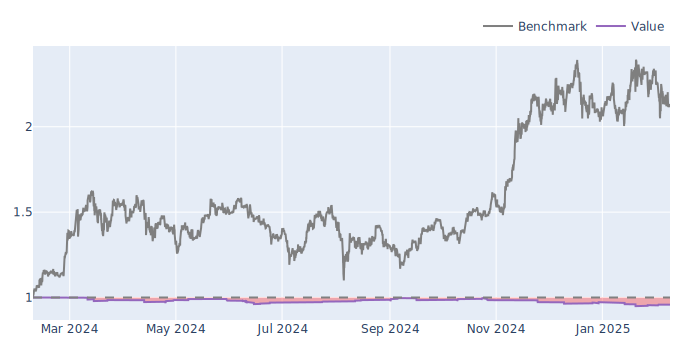

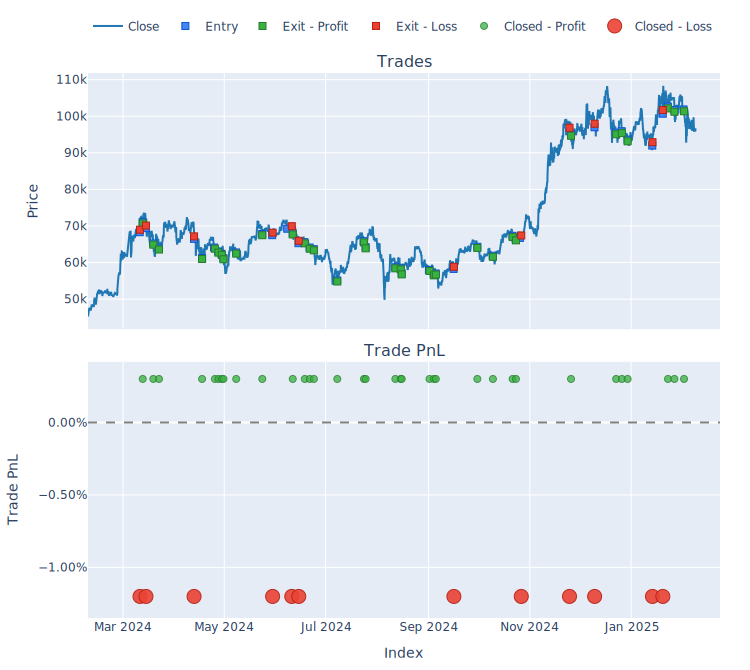

#########################
#########################
ETHUSDT


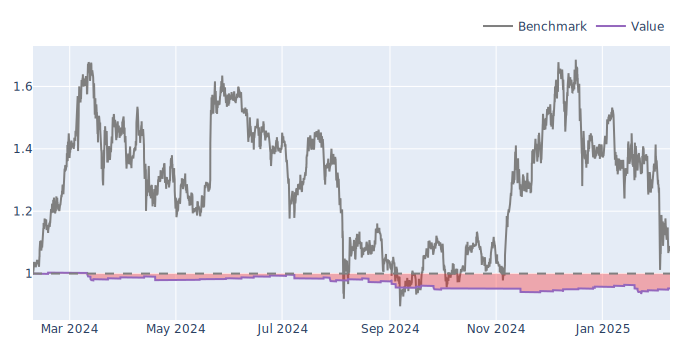

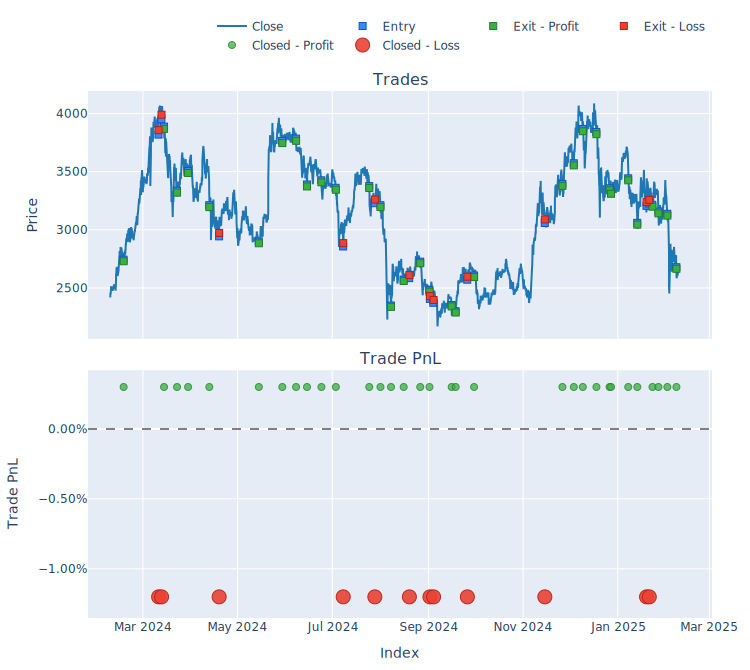

#########################
#########################
SOLUSDT


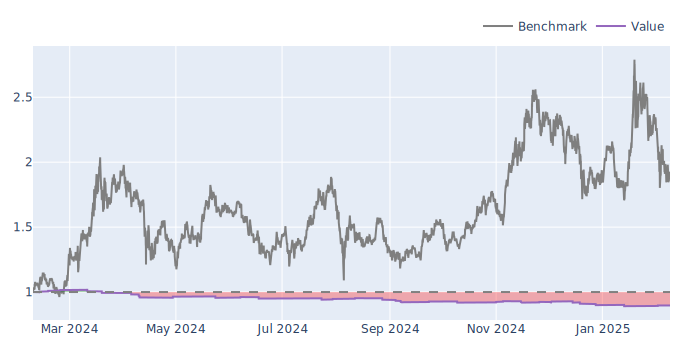

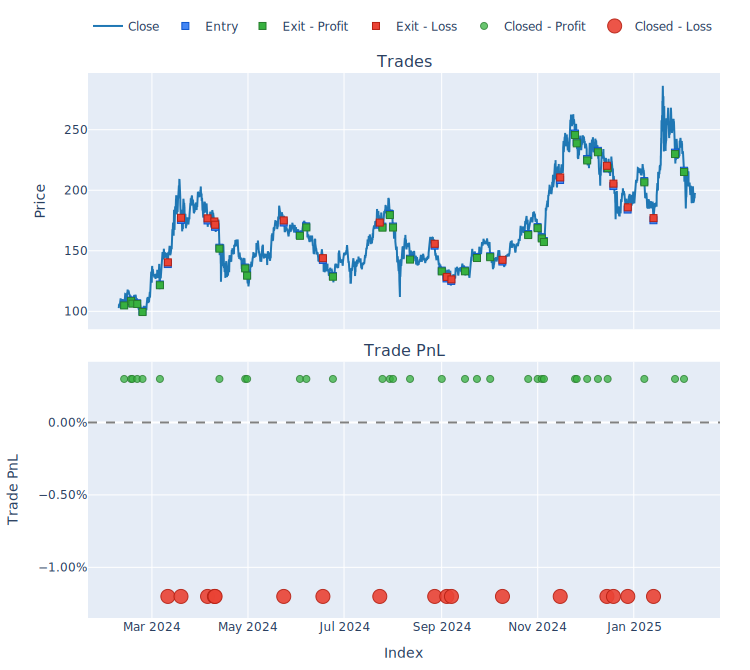

#########################
#########################
BNBUSDT


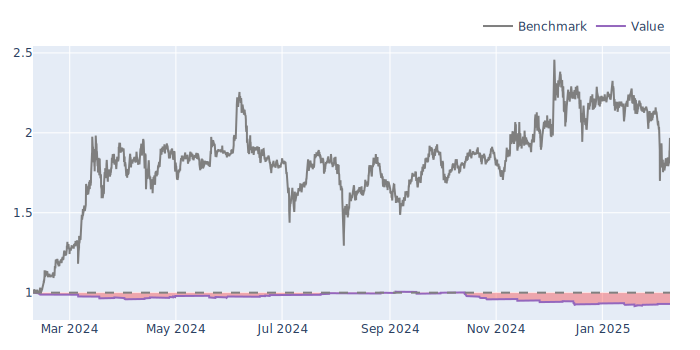

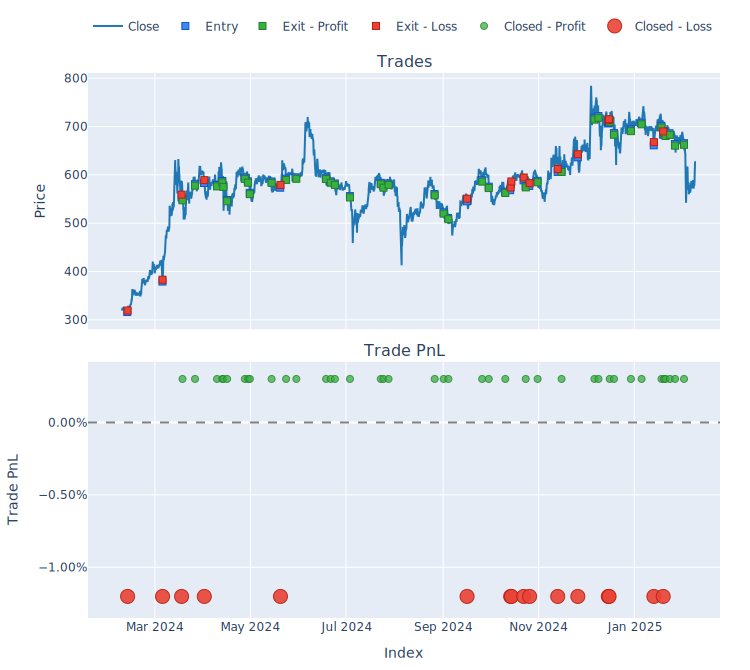

#########################


In [9]:
idxs = [0]
for idx in idxs:
   for symbol in symbols:
      pf = pf_dict[symbol].copy()
      print("#########################")
      print(symbol)
      pf[joined_best_df.index[idx]].plot_cum_returns().show_svg()
      pf.trades[joined_best_df.index[idx]].plots(settings=dict(plot_zones=False)).show_svg()
      print("#########################")